<center> <h1>SEIR model</h1> </center>


SEIR model is one of the compartmental models which is used in mathematical modelling of infectious diseases. Here, the population is assigned to compartments with labels:
- S : Susceptible 
- E : Exposed 
- I : Infectious
- R : Recovered 

S is the fraction people who are able to contract the disease. E is the fraction of people who have been infected but are not yet infectious. I is the fraction of people who are capable of transmitting the disease. R is the fraction of people who have been recovered and have become immune. 

The number of people in S, E, I, R combine to form the population N. 
- $S + E + I + R = N$

Model:  
\begin{align*}
\mathrm{S} \overset{\beta }{\longrightarrow} \mathrm{E} \overset{\gamma}{\longrightarrow} \mathrm{I} \overset{\alpha}{\longrightarrow} \mathrm{R}  \\
\end{align*}

The infectious rate, \mathrm{\beta}, controls the rate of spread which represents the probability of transmitting disease between a susceptible and an exposed individual. The incubation rate,\mathrm{\gamma}, is the rate of latent individuals becoming infectious (average duration of incubation is 1/\mathrm{\gamma}). Recovery rate, \mathrm{\alpha} is the rate at which people recover.

Ordinary Differential Equation (ODE):  
\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}T}= - \frac{\beta S I}{N}  \\
& \frac{\mathrm{d}E}{\mathrm{d}T}=\frac{\beta S I}{N} - \gamma E  \\
& \frac{\mathrm{d}I}{\mathrm{d}T}= -\gamma E - \alpha I  \\
& \frac{\mathrm{d}R}{\mathrm{d}T}= \alpha I  \\
\end{align*}




**Background**: When you first get infected with a disease often you might not have symptoms and may not be spreading. This is the latency period. 

**Importing necessary libraries**:
1. Numpy: NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. [Link](https://numpy.org/)
2. scipy: SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many more. [Link](https://scipy.org/)
3. scipy.integrate: The scipy.integrate sub-package provides several integration techniques including an ordinary differential equation integrator. [Link](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)
4. matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [Link](https://matplotlib.org/)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

Here N is the total population which is 1000. E0 which are the initially exposed which are 0. We have 10 infected people I0 and 990 susceptible people S0. 

We see that, S + E + I + R =  990 + 0 + 10 + 0 = 1000 = N, which is the total population. 

We have assumed beta which is the 

In [2]:
N = 1000              # total population
E0 = 0                # Exposed
I0 = 10               # Infectious
R0 = 0                # Recovered
S0 = 990              # Susceptible

# Transition Rates
beta = 0.5            # Disease transmission between Susceptible and exposed
gamma = 0.3           # Disease transmission between exposed and infectious
alpha = 0.3           # Recovery rate

# Calculating over the course of one year
t = np.linspace(0, 365, 365)  # Returns evenly spaced numbers over an interbal 0 to 365

# Convering the ode model to a function
# The function SEIR_model takes in y, t, N, beta, gamma and alpha as it's inputs
    # y is the array of initial conditions - [S0, R0, I0, R0]
    # t is the array of time
    # N is the total population 
    # beta, gamma and alpha are the transition rates

# This function returns the system of ode's which we will solve using the odeint function
def SEIR_model(y, t, N, beta, gamma, alpha):
    S, E, I, R = y
    dSdt = -beta*S*I/N                #dS
    dEdt = (beta*S*I/N) - gamma*E     #dE
    dIdt = gamma*E - alpha*I          #dI
    dRdt = alpha*I                    #dR
    return dSdt, dEdt, dIdt, dRdt


In [3]:
y0 = S0, E0, I0, R0  # Array of intial conditions (number of susceptible, exposed, infected and recovered people)

# Here we are solving the system of equations that we modelled earlier
    # SEIR_model is the function that returns derivative balues at requested y and t values as dydt
    # y0 are the initial conditions of the differential states
    # t is the time points at which the solutions should be reported
    # arguments are the input values that our model needs (extra arguments to pass to the function)
solve = odeint(SEIR_model, y0, t, args = (N, beta, gamma, alpha))
S, E, I, R = solve.T # transposing the matrix


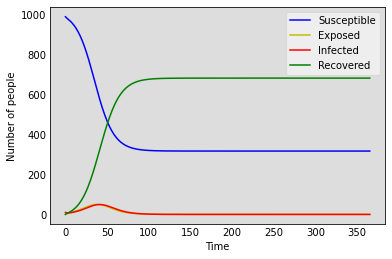

In [5]:
# Plotting
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', label='Susceptible')
ax.plot(t, E, 'y', label='Exposed')
ax.plot(t, I, 'r', label='Infected')
ax.plot(t, R, 'g', label='Recovered')
ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)